In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import  StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
data=pd.read_csv("Loan.csv")

In [4]:
data

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


one hot ve label encoding farkı 

In [7]:
data.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

risk_score ve loan approved 

In [10]:
data=data.drop(["ApplicationDate"],axis=1)

In [ ]:
data

In [13]:
 
correlation = data['RiskScore'].corr(data['LoanApproved'])
print(f"Risk Score ve Loan Approved arasında korelasyon: {correlation}")


Risk Score ve Loan Approved arasında korelasyon: -0.7661374114914381


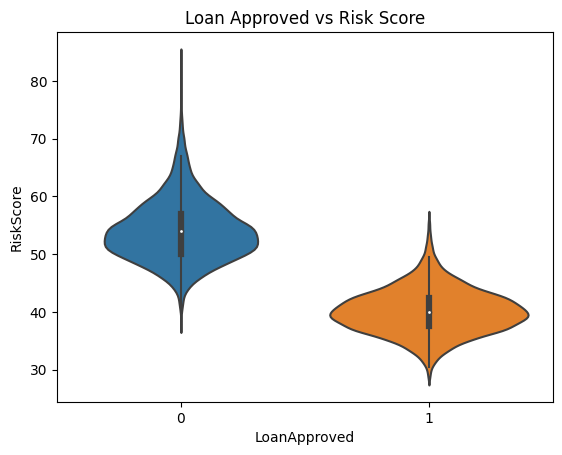

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.violinplot(x='LoanApproved', y='RiskScore', data=data)
plt.title('Loan Approved vs Risk Score')
plt.show()


Negatif korelasyon -1'e ne kadar yakınsa, o kadar güçlü bir ters ilişki vardır. Bu durumda, -0.76 değeri oldukça güçlü bir ters ilişki gösteriyor.
Bu sonuca göre, Risk Score'u düşürmek, kredi onaylanma olasılığını arttırır.


In [15]:
 
correlation = data['RiskScore'].corr(data['NetWorth'])
print(f"Risk Score ve NetWorth arasında korelasyon: {correlation}")


Risk Score ve NetWorth arasında korelasyon: -0.3043334363008729


çok fazla özellik olduğu için 10 tane özellik seçip risk ,score ' tahminini ona göre yapmak istiyorum

In [18]:
data.columns

Index(['Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus',
       'EducationLevel', 'Experience', 'LoanAmount', 'LoanDuration',
       'MaritalStatus', 'NumberOfDependents', 'HomeOwnershipStatus',
       'MonthlyDebtPayments', 'CreditCardUtilizationRate',
       'NumberOfOpenCreditLines', 'NumberOfCreditInquiries',
       'DebtToIncomeRatio', 'BankruptcyHistory', 'LoanPurpose',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
       'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate',
       'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved',
       'RiskScore'],
      dtype='object')

bunlar benim seçtiklerim , ama corelasyondan en fazla etkileyen 10 taneyi bulup o şekilde ilerleyebiliriz.

1) NetWorth
2) LoanApproved 
3) CreditScore
4) AnnualIncome 
5) LoanAmount
6) MonthlyIncome
7) EducationLevel
8) JobTenure
9) MonthlyDebtPayments
10) SavingAccountBalance

In [19]:
correlations = data.corr()['RiskScore'].sort_values(ascending=False)

C:\Users\ninja\AppData\Local\Temp\ipykernel_29176\2344025308.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()['RiskScore'].sort_values(ascending=False)


In [20]:
correlations

RiskScore                     1.000000
BankruptcyHistory             0.377578
TotalDebtToIncomeRatio        0.342643
DebtToIncomeRatio             0.326500
InterestRate                  0.268203
PreviousLoanDefaults          0.258659
BaseInterestRate              0.256233
LoanAmount                    0.137981
MonthlyLoanPayment            0.115501
CreditCardUtilizationRate     0.108758
TotalLiabilities              0.055617
LoanDuration                  0.054550
MonthlyDebtPayments           0.036938
NumberOfOpenCreditLines       0.007762
NumberOfCreditInquiries       0.003103
SavingsAccountBalance         0.002190
NumberOfDependents            0.001686
CheckingAccountBalance       -0.004044
JobTenure                    -0.004393
UtilityBillsPaymentHistory   -0.005196
PaymentHistory               -0.016992
Age                          -0.164304
Experience                   -0.166496
LengthOfCreditHistory        -0.177796
CreditScore                  -0.240198
TotalAssets              

In [21]:
top_10_features = correlations.drop('RiskScore').abs().sort_values(ascending=False).head(10)

In [22]:
top_10_features

LoanApproved              0.766137
MonthlyIncome             0.487039
AnnualIncome              0.483289
BankruptcyHistory         0.377578
TotalDebtToIncomeRatio    0.342643
DebtToIncomeRatio         0.326500
NetWorth                  0.304333
TotalAssets               0.297117
InterestRate              0.268203
PreviousLoanDefaults      0.258659
Name: RiskScore, dtype: float64

In [94]:
X=data[["LoanApproved","MonthlyIncome","AnnualIncome","BankruptcyHistory","TotalDebtToIncomeRatio","DebtToIncomeRatio","NetWorth","TotalAssets","InterestRate","PreviousLoanDefaults"]]
y=data["RiskScore"]

In [95]:
from sklearn.preprocessing import StandardScaler
import pickle

In [96]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

with open("scaler.pkl","wb") as file:
    pickle.dump(scaler,file)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)

In [100]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

In [102]:
ann_model = MLPRegressor(max_iter=1000, random_state=42)
 
param_grid = {
    'hidden_layer_sizes': [(32,), (64,), (32, 32), (64, 64), (32, 64)],  
    'activation': ['relu', 'tanh'],   
    'solver': ['adam', 'lbfgs'],   
    'learning_rate': ['constant', 'adaptive'],   
    'alpha': [0.0001, 0.001, 0.01],  
    'batch_size': [10, 32, 64],  
}

 
grid_search = GridSearchCV(ann_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
 
print(f"Best Params: {grid_search.best_params_}")
print(f"Best Score (Negative MSE): {grid_search.best_score_}")

 
best_model = grid_search.best_estimator_

 
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


KeyboardInterrupt: 

zaman ve imkanlar . .  . 